# Анализ игры футбольных нападающих современной эпохи в лучших европейских топ-лигах . Их кластеризация с аспекта их "опастности" для вражеских ворот

## Описание проблемы

###### Аналитические и статистические методы становтся все более популярными в современном футболе. Их активно используют для выбора оптимальной тактики для команды, состава для определенной игры , пищевого рациона футболистов, их эффективности и т.д. . К примеру, лучшие футбольные клубы мира, как "Ливерпуль", "Милан", "Бавария" являются активными пользователями всех этих методов. Также важна не только аналитка признаков, свойственных игрокам и клубам в ныненшний момент, но и аналитика тех признаков, которые были свойственны им в прошлом. Это характерна и для нашей проблемы. Целью этого исследования является разделения нападающих лучших футбольных лиг на классы, которые будут характеризировать их эффективность с точки зрения опастности для чужих ворот. Это исследование будет полезно в сравнительной ипостаси для руководителей клубов, тренеров, спортивных аналитиков и просто любителей спорта. Оно сможет ответить на следующие вопросы. Какие характеристики имеют лучшие нападающие в наше время? Какой характеристики свойственны среднему уровню нападающих? Как изменился уровень нападающих в ходе истории? Насколько сильно лучшие нападающие прошлого отличаются от лучших нападающих современного периода? Какая была статистика у игрока, играющего в будущем, в этом периоде? Прогрессирует ли он или же, наоборот, регрессирует? Стоит ли покупать этого игрока или не стоит? Стоит ли продать этого игрока или нет? На самом деле, вопрос можно задать довольно много и это исследование, как раз и создано для того, чтобы ответить на них

## Источник данных

###### Данные взяты с сайте Kaggle. Ссылка на датасет: https://www.kaggle.com/datasets/mohamedhanyyy/top-football-leagues-scorers. Собственно, в датасете предствленны данные по нападающим за 2016-2020 год из 4 лиг: Seria A (Италия), Bundesliga (Германия), Premier League (Англия), Seria A Brasil (Бразилия). 

## Перейдем к анализу

In [77]:
import pandas as pd

import numpy as np

import plotly.express as pl

import seaborn as sea

import sklearn

import matplotlib.pyplot as plt

In [78]:
rora = pd.read_csv(r"D:\Data.csv", encoding = 'utf-8-sig', delimiter = ',')

df = pd.DataFrame(rora)

# Описательная данных

In [79]:
df.head()

,Country,League,Club,Player Names,Matches_Played,Substitution,Mins,Goals,xG,xG Per Avg Match,Shots,OnTarget,Shots Per Avg Match,On Target Per Avg Match,Year
0,Spain,La Liga,(BET),Juanmi Callejon,19,16,1849,11,6.62,0.34,48,20,2.47,1.03,2016
1,Spain,La Liga,(BAR),Antoine Griezmann,36,0,3129,16,11.86,0.36,88,41,2.67,1.24,2016
2,Spain,La Liga,(ATL),Luis Suarez,34,1,2940,28,23.21,0.75,120,57,3.88,1.84,2016
3,Spain,La Liga,(CAR),Ruben Castro,32,3,2842,13,14.06,0.47,117,42,3.91,1.40,2016
4,Spain,La Liga,(VAL),Kevin Gameiro,21,10,1745,13,10.65,0.58,50,23,2.72,1.25,2016


###### Сосбтвенны, первые четыре столбца относятся к номинальной шкале, так как это просто имена, чтобы отличить один объект от другого.  Country  говорит о том, в какой стране играет футболист, Leaugue  - о лиге, в которой он играет, Club - аббревиатура футбольного клуба, а Player Names его имя и фамилия. Year говорит о том, какая статистика была у футболиста за сезон года, представленно в столбце Year. Этот признак будет относится к интеравальной шкале,  так как время как такое это довольно абстрактная характерстика, которой может не быть. Mathches_Played показывает, сколько матчей игрок сыграл за сезон. Substitution же показывает, сколько раз игрока заменили за сезон. Mins - сколько минут он сыграл за сезон. Goals - сколько голов забил за сезон. xG  - математическая величина, которая говорит о том, сколько голевых шансов была создано игроком за сезон.  xG Per Avg Match, в свою очередь, показывает сколько голевых моментов в среднем создает за матч игрок. Shots - количество ударов. On Target - количество ударов в створ. Shots Per Avg Match - среднее количество ударов за матч. On Target Per Avg Match - среднее количество ударов вствор. Все перечисленные после Year признаки относятся к относительной шкале, так как у них всех есть абсолютный ноль (0 сыгранных матчей, 0 ударов, 0 xG и т.д.) . Сомнения может вызвать столбец Mins, но и он является относительным, так как, фактически, игрок мог бы сыграть 0 минут за сезон. Но не все данные нам нужны для анализа. От каких-то мы избавимся, а какие-то добавим.

In [80]:
df = df.drop(columns = ['Country', 'League', 'Club', 'Year'])

In [81]:
df.head()

df['Experience'] = 1

##### Добавили еще один столбец, где единица будет обозначать один сезон, в котором играл игрок. После группировки получим суммароное количество лет, которые играл игрок

In [82]:
lola = df.groupby('Player Names').sum()

In [83]:
haha = pd.DataFrame(lola)

In [84]:
haha = lola.reset_index()

In [85]:
haha.head()

,Player Names,Matches_Played,Substitution,Mins,Goals,xG,xG Per Avg Match,Shots,OnTarget,Shots Per Avg Match,On Target Per Avg Match,Experience
0,Abdou Harroui,10,0,834,4,1.93,0.22,24,13,2.73,1.48,1
1,Adrien Hunou,13,10,1325,8,7.25,0.52,28,15,2.01,1.08,1
2,Adrien Thomasson,24,1,2168,7,5.25,0.23,50,18,2.19,0.79,1
3,Aduriz,27,5,2480,16,15.92,0.61,85,45,3.26,1.72,1
4,Alassane Plea,53,8,4865,22,22.90,0.90,160,76,6.27,2.97,2


##### Собственно, получили новый датасет, где в каждом ряду имеем суммарную статистику за все четыре года. Теперь посчитаем средние значения по годам по нужным показателям

In [86]:
for i in list(haha)[1:11]:
    haha[i] = round(haha[i]/haha['Experience'],2) ### Делим каждый показатель на Experience (количество сезонов, в которых играл игрок), чтобы получить данные о том, какую статистику в среднем имел игрок за сезон

In [87]:
haha.head()

,Player Names,Matches_Played,Substitution,Mins,Goals,xG,xG Per Avg Match,Shots,OnTarget,Shots Per Avg Match,On Target Per Avg Match,Experience
0,Abdou Harroui,10.0,0.0,834.0,4.0,1.93,0.22,24.0,13.0,2.73,1.48,1
1,Adrien Hunou,13.0,10.0,1325.0,8.0,7.25,0.52,28.0,15.0,2.01,1.08,1
2,Adrien Thomasson,24.0,1.0,2168.0,7.0,5.25,0.23,50.0,18.0,2.19,0.79,1
3,Aduriz,27.0,5.0,2480.0,16.0,15.92,0.61,85.0,45.0,3.26,1.72,1
4,Alassane Plea,26.5,4.0,2432.5,11.0,11.45,0.45,80.0,38.0,3.14,1.48,2


#### Получили нужный нам датасет и теперь может переходить к описательной статистики, визуализации, а затем к кластеризации. Но перед этим уберем столбец 'Goals', так как он может вести в небольшую дезинформацию. К примеру, игрок играл два года,в первом году он забил 30 голов, а во втором году лежал травмированный. Тогда он забил только 15 голов за сезон, что не совсем объективно. В этом отношение коэффицикент xG информативнее.  Также уберем Shots и On Target

In [88]:
finale = haha.drop(columns = ['Player Names', 'Goals', 'Shots', 'OnTarget'])

In [89]:
finale['Matches_Played'] = np.floor(finale['Matches_Played'])
finale[list(finale)[1]] = np.floor(finale[list(finale)[1]]) ### тут мы работаем со столбцом Substitution.

In [90]:


finale = finale.add_suffix('_per season')

finale = finale.rename(columns = {'Experience_per season': 'Experience'})

finale.head()

,Matches_Played_per season,Substitution _per season,Mins_per season,xG_per season,xG Per Avg Match_per season,Shots Per Avg Match_per season,On Target Per Avg Match_per season,Experience
0,10.0,0.0,834.0,1.93,0.22,2.73,1.48,1
1,13.0,10.0,1325.0,7.25,0.52,2.01,1.08,1
2,24.0,1.0,2168.0,5.25,0.23,2.19,0.79,1
3,27.0,5.0,2480.0,15.92,0.61,3.26,1.72,1
4,26.0,4.0,2432.5,11.45,0.45,3.14,1.48,2


## Описательная статистика

In [121]:
finale.describe().T

,count,mean,std,min,25%,50%,75%,max
Mins_per season,444.0,2015.321914,807.158734,280.00,1496.0025,2150.000,2616.0500,3931.00
xG Per Avg Match_per season,444.0,0.445788,0.162332,0.07,0.3300,0.420,0.5325,1.10
Shots Per Avg Match_per season,444.0,2.810946,0.789752,0.80,2.2875,2.775,3.2325,6.28
On Target Per Avg Match_per season,444.0,1.239437,0.393487,0.24,0.9600,1.205,1.4700,2.89
Experience,444.0,1.486486,0.932143,1.00,1.0000,1.000,2.0000,5.00
On Target Shots/ Shots,444.0,0.444752,0.086568,0.23,0.3900,0.440,0.4900,0.83


### Переходим к визуализации

<AxesSubplot:xlabel='Substitution _per season', ylabel='Count'>

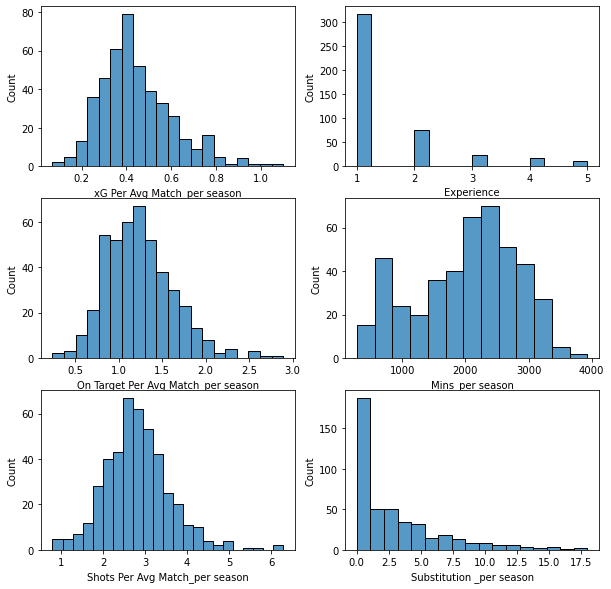

In [91]:
fig, axes = plt.subplots(3,2, figsize = (10,10))
sea.histplot(finale, x = 'xG Per Avg Match_per season', ax = axes[0][0])
sea.histplot(finale, x = 'On Target Per Avg Match_per season', ax = axes[1][0])
sea.histplot(finale, x = 'Shots Per Avg Match_per season', ax = axes[2][0])
sea.histplot(finale, x = 'Experience', ax = axes[0][1]) ### здесь скорее по смыслу большое barplot заложен
sea.histplot(finale, x = 'Mins_per season', ax = axes[1][1])
sea.histplot(finale, x = list(finale)[1], ax = axes[2][1])


###### Уже из имеющихся графиков можно сделать достаточно много интересных выводов о наших данных. Во-первых, заметим, что средний xG за матч, среднее количество ударов за матч, среднее количество ударов в створ за матч имеет распределение, довольно близкое к норамльному. То есть, к примеру, для большинства нападающих ( которых, кстати, можно рассматривать как средний уровень) xG должен находится на уровни от 0.3 до 0.5 . Выше будут находится нападаюищие более высокого класса, а ниже будут находится нападающие низкого класса. Для среднего количества ударов в створ за матч средний уровень где-то в районе от 0.7 до 1.5, а для ударов за матч где-то от 2 до 3. Предлагаю посчитать еще один показатель, который будет считать долю ударов в створ от всех ударов. Может быть довольно информативным. А назовем его 'On Target Shots/Shots'
###### Также давайте посмотрим на барплот касающийся количества лет, которые играют нападающие. Видим, что большинство играет от 1 года до 2, в то время как больше 3 лет играет довольно малое количество игроков. Можно составить несколько гипотез. Первая: на уровне лучших футбольныз лиг средним нападающим продержатся более двух лет довольно сложно. По итогу остаются только самые лучшие. Вторая: возможно, какая-то часть игроков, активно отыгравших до 2016 года, решила именно в период с 2016 по 2017 завершить свою карьеру.  Более вероятным кажется первый вариант, так как в топ-клубах позиции нападающих часто являются несменяемыми несколько лет к ряду, в то время как для середняков и индердогов характерна частая ротация футблистов.
###### Также заметим, что среднее количество сыгранных минут за матч также имеет распределение, похожее на нормальное. Большинсво игроков играет примерно от 2000 до 2500 минут за сезон. По заменам все в целом понятно. Чаще всего меняеют игроков полузащиты, фланогов, так как у них более энергозатратная роль, а нападающих меняют редко, ведь физическая нагрузка в плане бега, контроля мяча у них будет однозначно поменьше

In [92]:
finale['On Target Shots/ Shots'] = finale['On Target Per Avg Match_per season']/finale['Shots Per Avg Match_per season']
finale['Minutes per Match'] = finale['Mins_per season']/finale['Matches_Played_per season']

<AxesSubplot:xlabel='Minutes per Match', ylabel='Count'>

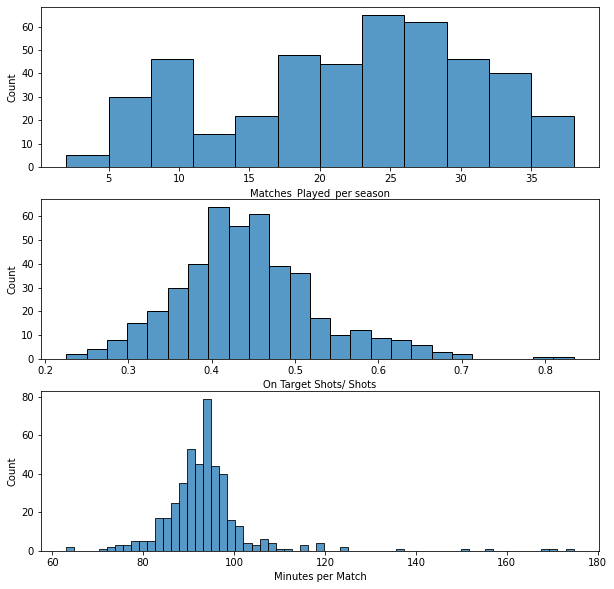

In [93]:
foga, axes1 = plt.subplots(3,1, figsize = (10,10))
sea.histplot(finale, x = 'Matches_Played_per season', ax = axes1[0])
sea.histplot(finale, x = 'On Target Shots/ Shots', ax = axes1[1])
sea.histplot(finale, x = 'Minutes per Match', ax = axes1[2])

###### Как видно из первого графика сверху, большинство  играет от 24 до 30 матчей за сезон. Но тут интересено второй график. Как видно, у нас получилось бимодальное распределение. У большинства игроков доля точноности составляет от 0.4 до 0.5. То есть, примерно каждый второй удар - в створ. Интересен и выброс. У некоторых игроков доля точности составляет 0.8, что разительно выделяет их от всех остальной массы. Кстати, придумал еще один показатель: а сколько минут в среденм каждый игрок проводит за матч. Есть довольно странные значения вроде 120, 140, что может говорить о неточности в данных, но можно однозначно выявить большинство, а оно, свою очередь, чаще всего играет от 80 до 90 минут. То есть, нападающих чаще всего меняют именно в этот временной промежуток.

##### Собственно, теперь перейдем к дальнейшему, только заранее уберем некоторые столбцы, которые в кластеризации не очень сильно понадобятся

## Датасет до удаления нескольких столбцов

In [95]:
finale.head()

,Matches_Played_per season,Substitution _per season,Mins_per season,xG_per season,xG Per Avg Match_per season,Shots Per Avg Match_per season,On Target Per Avg Match_per season,Experience,On Target Shots/ Shots,Minutes per Match
0,10.0,0.0,834.0,1.93,0.22,2.73,1.48,1,0.542125,83.400000
1,13.0,10.0,1325.0,7.25,0.52,2.01,1.08,1,0.537313,101.923077
2,24.0,1.0,2168.0,5.25,0.23,2.19,0.79,1,0.360731,90.333333
3,27.0,5.0,2480.0,15.92,0.61,3.26,1.72,1,0.527607,91.851852
4,26.0,4.0,2432.5,11.45,0.45,3.14,1.48,2,0.471338,93.557692


In [96]:
finale = finale.drop(columns = ['Matches_Played_per season', list(finale)[1], 'Minutes per Match', 'xG_per season'])

## Датасет после удаления некоторых столбцов

In [98]:
finale['On Target Shots/ Shots'] = round(finale['On Target Shots/ Shots'],2)

finale.head()

,Mins_per season,xG Per Avg Match_per season,Shots Per Avg Match_per season,On Target Per Avg Match_per season,Experience,On Target Shots/ Shots
0,834.0,0.22,2.73,1.48,1,0.54
1,1325.0,0.52,2.01,1.08,1,0.54
2,2168.0,0.23,2.19,0.79,1,0.36
3,2480.0,0.61,3.26,1.72,1,0.53
4,2432.5,0.45,3.14,1.48,2,0.47


###### Сосбтвенно, перчислю столбцы, которые убрал и поясню причины. Убрал Matches_Played и Minutes per Match, так как они так или иначе будут анологичны столбцу Mins, убрал Substitution, так как мы выяснили, что большинство нападающих вообще не заменяют (значение равно нулю). Убрал xG, так как xG Per Avg Match является более информативным. После удаления столбцов остались 6 признаков. Все признаки были расписаны выше, но повторю, что здесь все являются относительными, в том числе новый показатель on Target Shots/Shots, так как он получен из отношения двух других признаков.

In [122]:
finale.describe().T

,count,mean,std,min,25%,50%,75%,max
Mins_per season,444.0,2015.321914,807.158734,280.00,1496.0025,2150.000,2616.0500,3931.00
xG Per Avg Match_per season,444.0,0.445788,0.162332,0.07,0.3300,0.420,0.5325,1.10
Shots Per Avg Match_per season,444.0,2.810946,0.789752,0.80,2.2875,2.775,3.2325,6.28
On Target Per Avg Match_per season,444.0,1.239437,0.393487,0.24,0.9600,1.205,1.4700,2.89
Experience,444.0,1.486486,0.932143,1.00,1.0000,1.000,2.0000,5.00
On Target Shots/ Shots,444.0,0.444752,0.086568,0.23,0.3900,0.440,0.4900,0.83


# Изучение зависимостей

###### Для изучения зависимостей будем использовать скаттерплоты. Зависимости будет искать только по интересующим для нас данных.

In [102]:
fig = pl.scatter(finale, x = 'Experience', y = 'xG Per Avg Match_per season', title = 'Relations between Experience and xG per Year')

fig1 = pl.box(finale, x = 'Experience', y = 'xG Per Avg Match_per season')

fig.show()

fig1.show()

###### Первые два графика построены, чтобы выяснит зависит ли количество созданных моментов от опыта. Скаттерплот помог выстроить предположения, что возможно чем больше опыта, то тем больше будет нападающий создавать голевых моментов. Боксплот же это подтвердил. Как видно на втором график, средняя у боксполта будет повышать по мере увеличения опыта. Вывод: чем опытнее игрок, те он опаснее.

In [114]:
fog = pl.scatter(finale, x = 'Mins_per season', y = 'xG Per Avg Match_per season', trendline = 'ols', title = 'Relations between xG per Match and minutes played')

fog.show()

###### Как видно из этого скаттера, строгой зависимости между количеством минут, которые игрок проводит на поле за сезон в среденем, и xG нет. Он может как мало проводить, но иметь большой xG, так и наоборот. Но тренд показывает, что по мере увеличения игрового времени эффективность все-таки склонна к понижению. Этому есть несколько причин. Во-первых, накопленная усталость. Во-вторых, планку на длинной дистанции поддерживать тяжелее, чем на короткой.

In [112]:
fag = pl.scatter(finale, x = 'Shots Per Avg Match_per season', y = 'On Target Shots/ Shots', trendline = 'ols', title = 'Relations between Accuracy and Shots')


fag.show()

###### Этот скаттерплот, показывает зависимость точности ударов от количества нанесенных ударов. Как видно, чем больше ударов наносится, тем меньше точность. Поэтому, видимо, не стоит бить чаще в надежде, что сможешь с большей вероятностью поразить ворота.

In [116]:
figa = pl.scatter(finale, x = 'Shots Per Avg Match_per season', y = 'xG Per Avg Match_per season', trendline = 'ols')

figa.show()

###### А тут видна вполне логичная зависимость, которая подтверждает логичную зависимость: чем больше ударов, тем больше xG.

## Вывод по зависимостям

###### Можем сделать нексколько выводов. Во-первых, чем опытнее игрок, тем больше голевых моментов он создает. Во-вторых, чем больше игрок будет играть, тем меньше со временем он создавать голевых моментов. В-третьих, чем больше наносится ударов, тем меньше их точность. В-четвертых, чем больше ударов, тем меньше точность.

# Кластеризация

###### Собственно, теперь можем перейти к кластеризации. Основной целью кластеризации для нас будет разделения на классы по их качеству. Какие характеристки свойственным лучшим, а какие худшим из них и т.д.

## Kmeans

###### Метод работает так. Для начала мы выбираем n количество кластеров. Потом радномно (или нет) ставим  n точек на систему координат. Смотрим на то, какой объект к какому кластеру ближе. Определяем состав каждого кластера. А потом перерасчитываем координаты каждого кластера путем вычисления среднего арифмитеского по каждому признаку каждого объекта. И нексолько раз повторяем этот процесс, до тех пор, пока объекты кластеров не будут сильно различаться.

In [328]:
from sklearn.cluster import KMeans, DBSCAN, Birch
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
scaler = StandardScaler()
x = scaler.fit_transform(finale)
model = KMeans(n_clusters=2, n_init = 1, max_iter = 10)

In [329]:
model.fit(finale)
clusters = model.predict(finale)

C:\Users\1\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.



In [237]:
fina1 = finale.assign(cluster = clusters)
fina1.head()

,Mins_per season,xG Per Avg Match_per season,Shots Per Avg Match_per season,On Target Per Avg Match_per season,Experience,On Target Shots/ Shots,cluster
0,834.0,0.22,2.73,1.48,1,0.54,1
1,1325.0,0.52,2.01,1.08,1,0.54,1
2,2168.0,0.23,2.19,0.79,1,0.36,0
3,2480.0,0.61,3.26,1.72,1,0.53,0
4,2432.5,0.45,3.14,1.48,2,0.47,0


In [238]:
fina1['cluster'] = fina1['cluster'].astype('str')

In [239]:
fig = pl.scatter_3d(fina1, x = 'xG Per Avg Match_per season', y = 'On Target Shots/ Shots', z = 'On Target Per Avg Match_per season', color = 'cluster')

fig1 = pl.scatter(fina1, y = 'xG Per Avg Match_per season', x = 'Shots Per Avg Match_per season', color = 'cluster')
fig.show()
                  
fig1.show()                  

In [240]:
silhouette_score(x, model.labels_)

0.16062937816220083

###### Могу сказать, что K-means не очень хорошо подходит для этих данных. Исходя из оценки качества модели путем silhouette_score, которою я использовал, чтобы определить наилучшее количество кластеров, оптимальное количество кластеров равно 2 (sil_scoe = 0.16). При трех кластерах значение коэффициента уменьшаласб в два раза. Но собственно почему метод плохой для нашей выборки? В футболе все построено на небольших различаях. То есть топовый футболист не всегда сильно лучше среднего, но это небольшая разница создает ограмную разницу для команды. Поэтому все объекты прилегают к друг другу довольно тесно, в связи с чем довольно тяжело провести радикальные различия между кластерами, особенно если их много. Но конкретно по этой задаче получилось так, что в одно кластере располагаются средние игроки, а во втором кластере отличающиеся от среднего, то есть и топовые, и игроки ниже среднего.

## DBSCAN

###### Берем определенную точку, присваиваем ей кластер. Потом говорим, не дальше какого расстояния от нее могут находится точки, которые будут называтся "соседями" и такие точки-соседи будут оказываться в одном кластере. Затем повторяем это для каждого нового объекта кластера. Находим его соседей и т.д, пока соседей не оставится совсем. Если вдруг у точки нет соседей, то она будет являтся выбросом. Когда закончили один кластер, переходим к другим точкам и смотрим соседей для них, пока не определим все кластеры и выбросы.

In [286]:
model = DBSCAN(eps=1.9)
fina2 = finale.assign(cluster = model.fit_predict(x))

In [287]:
fina2['cluster'] = fina2['cluster'].astype('str')

In [288]:
fig = pl.scatter_3d(fina2, x = 'Shots Per Avg Match_per season', y = 'xG Per Avg Match_per season', z = 'On Target Shots/ Shots', color = 'cluster')

fig.show()

In [289]:
silhouette_score(fina2, model.labels_)

0.11804300406546642

###### Собственно,  у DBSCAN такая же проблема, что и у Kmeans. Данные расположены слишком плотно, поэтому кластеры плохо отделяемы. Для определения оптимального количества кластеров также использовал silhouette_score, значения которого я каждый раз считал после смены максимально расстояния между соседями. Исходя из этого коэффициента, можем видеть, что это расстояние должно равнятся двум и оптимальное количество кластеров также равно 2. Также, результат схож с прошлым. Опять получили средних игроков(нулевой игрок) и выдаюищихся в обе стороны. Только теперь размер кластера средних сильно разросся. 

## Birch

###### Кратко говоря, Birch помогает работать с очень большими датасетами. Он работает примерно так же, как Kmeans, но перед этим он разбивает датасет на несколько subdatasets, после чего кластеризует объекты в subdatasets, после чего постепенно начинает собирать все subdatasets воедино с учетом кластеризации.

In [364]:
model = Birch(threshold = 0.001)

In [365]:
model.fit(finale)
cluster = model.fit_predict(finale)

In [366]:
fina3 = finale.assign(cluster = cluster)

In [367]:
silhouette_score(fina3, model.labels_)

0.5608449780127501

In [368]:
fina3['cluster'] = fina3['cluster'].astype('str')

In [369]:
fig = pl.scatter_3d(fina3, x = 'xG Per Avg Match_per season', y = 'On Target Shots/ Shots', z = 'On Target Per Avg Match_per season', color = 'cluster')

fig1 = pl.scatter(fina3, y = 'xG Per Avg Match_per season', x = 'Shots Per Avg Match_per season', color = 'cluster')
fig.show()
                  
fig1.show()    

###### Исходя из значения silhouette_score можно заключить, что из всех использованных моделей Birch явлалась самой оптимальной. Также нужно заметить, что здесь не приходится гадать с числом кластеров: алгоритм самостоятельно определяет их число. Собственно, у нас получилось три кластера, исходя из которых можно заключить, что во втором кластере чаще всего встречабтся игроки низкого класса, которые мало бьют по воротам и редко создают голевые моменты, хотя в нем также содержатся игроки высокого и среднего классов. Для 0 класстера характерно как достаточно большое наличие игроков выше среднего уровня, которые часто бьют по воротам и создают опасные моменты, так и среднего уровня. В 1 кластере в основном собрались середнячки по опастности для чужих ворот.

## Сравнения

###### Собственно, если мы говорим про нашу выбоку, то результаты Kmeans и DBSCAN очень похожи, так как оба метода работают плохо, когда объекты в выборке распалагаются плотно. По итогу, они подгоняют все под одну гребенку. В DBSCAN все чуть ли не все объекты являются соседями, а в Kmeans кластеры настолько теряются в плотности, что не знают куда деться. Безусловно, из всех применненных наилучшим является Birch, который позволил разбить плотности на своеобразные подплотнтсти, после чего собрать все воедино и получить более менее логичную картину, где между объектами, в нашем случае нападающими, существует какое-никакое, но разграничение.

# Результаты и впечатления

###### Сказать, что исследование удалось, будет неправдной. Так и не получилось составить модель высокого качества, которая бы разделила объекты на кластеры. Наиболее оптимальной моделью для нашего датасета является Birch, но и он до конца справился. Хотя, безусловно, сказать, что исследование провалилось - нельзя. Мы выяснили многие закономерности, которые перечислены в разделе "Выводы". К примеру, мы выяснили, что чем чаще бьет игрок, тем он неточнее. Или что чем дольше игрок играет в высших лигах, тем больше в среднем он создает голевых моментов за игру. Также из неудачной кластеризации становится ясно, что есть и другие признаки, не учтенные в нашем датасете, которые говорят о том, какого уровня нападающий. То есть,  если вдруг у нападающего низкий  xG или если он мало бьет и не точно бьет, то это не обязательно значит, что он нападающий низкого класса. Возможно, он исполняет какие-то другие функции, которые для классического нападающего не характерны. Поэтому на какие-то вопросы исследование ответило, но одновременно и открыло множется новых.
